In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


In [2]:
data_train=pd.read_csv('/kaggle/input/fake-news/train.csv')
data_test=pd.read_csv('/kaggle/input/fake-news/test.csv')

In [3]:
data_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
data_test.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [5]:
data_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [7]:
print("The shape of train data: ",data_train.shape)
print("The shape of test data: ",data_test.shape)

The shape of train data:  (20800, 5)
The shape of test data:  (5200, 4)


In [8]:
data_train['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [9]:
    data_train['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [10]:
len(data_train['author'].unique())

4202

<Axes: xlabel='author'>

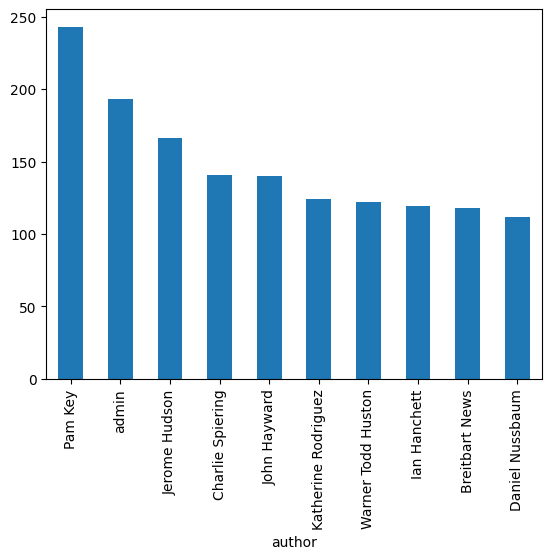

In [11]:
data_train['author'].value_counts()[:10].plot(kind='bar')

<Axes: xlabel='label'>

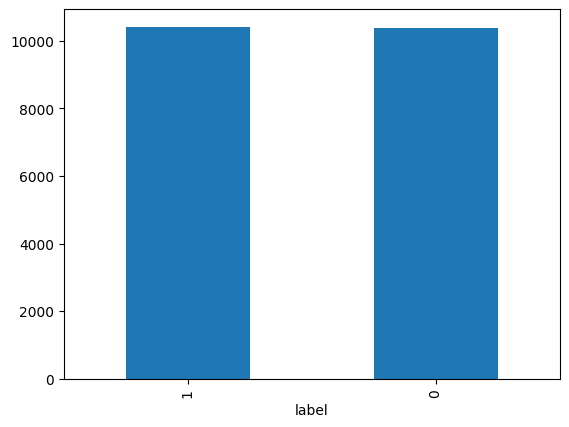

In [12]:
data_train['label'].value_counts().plot(kind='bar')            #1 Fake 0 Real

In [13]:
data_train = data_train.fillna('')
data_test = data_test.fillna('')

In [14]:
import re # regular expression
import string


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

data_train['text']= data_train['text'].apply(remove_URL)
data_train['text']= data_train['text'].apply(remove_html)
data_train['text']= data_train['text'].apply(remove_emoji)
data_train['text']= data_train['text'].apply(remove_punct)

In [15]:
data_test['text']= data_test['text'].apply(remove_URL)
data_test['text']= data_test['text'].apply(remove_html)
data_test['text']= data_test['text'].apply(remove_emoji)
data_test['text']= data_test['text'].apply(remove_punct)

In [16]:
import spacy

nlp=spacy.load('en_core_web_lg')

In [17]:
def preprocessing_text(text):
    doc=nlp(text)
    preprocessed=[]
    for text in doc:
        if text.is_stop or text.is_punct:
            continue
        preprocessed.append(text.lemma_)
    return " ".join(preprocessed)
    
    

In [18]:
data_train['text']= data_train['text'].apply(preprocessing_text)
data_test['text']= data_test['text'].apply(preprocessing_text)


In [20]:
data_train['text']=data_train['text'].apply(lambda x:x.lower())

In [21]:
data_test['text']=data_test['text'].apply(lambda x:x.lower())

In [24]:
data_train['text'][0]  #there are some unwanted texts still present after preprocessing as it more than one hour to run the "preprocessing_text" function i wont be cleaning it

'house dem aide comey letter jason chaffetz tweet darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah   image courtesy michael jolley available creative commonsby license \n apology keith olbermann doubt worst person world week fbi director james comey accord house democratic aide look like know secondworst person turn comey send nowinfamous letter announce fbi look email relate hillary clinton email server rank democrats relevant committee hear comey find tweet republican committee chairman \n know comey notify republican chairman democratic rank member house intelligence judiciary oversight committee agency review email recently discover order contain classified information long letter go oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir inform fbi learn existence email appear pertinent investigation case reopen \n jason chaffetz jasoninthehouse october 28 2016 \n course know case   comey actually say review email light u

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_train['text'],data_train['label'],test_size=0.2,random_state=2023,stratify=data_train['label'])

In [27]:
#BAG OF WORDS

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

mnbag=Pipeline([('bag_of_word',CountVectorizer(max_features=5555)),('MultiNB',MultinomialNB())])
mnbag.fit(x_train,y_train)    

Pipeline(steps=[('bag_of_word', CountVectorizer(max_features=5555)),
                ('MultiNB', MultinomialNB())])

In [29]:
y_pred=mnbag.predict(x_test)

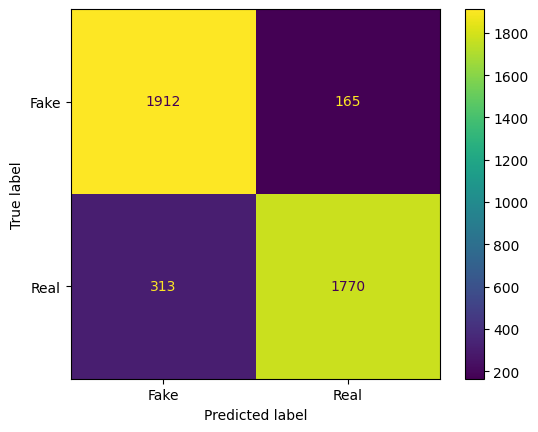

In [30]:
ConfusionMatrixDisplay.from_estimator(
                        mnbag,
                        x_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake','Real'])

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8850961538461538


In [32]:
data=pd.read_csv('/kaggle/input/fake-news/submit.csv')
data.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


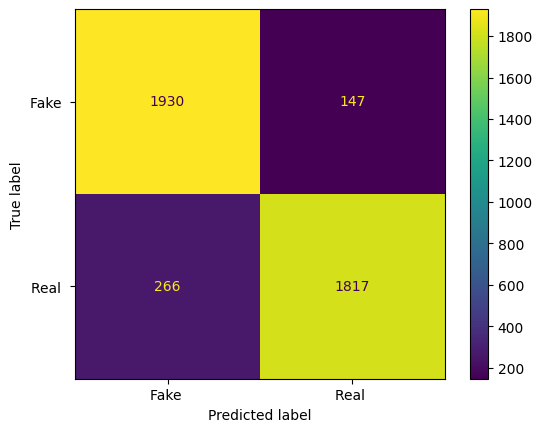

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf_bog_rf = Pipeline([
    ('bag-of-2-grams', CountVectorizer(ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

clf_bog_rf.fit(x_train, y_train)

y_pred = clf_bog_rf.predict(x_test)

ConfusionMatrixDisplay.from_estimator(
                        clf_bog_rf,
                        x_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake ','Real '])

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9007211538461538


In [38]:
y_pred_test=clf_bog_rf.predict(data_test['text'])

In [39]:
data['label']=y_pred_test

In [41]:
data.to_csv("submission.csv", index=False)

0.7627403846153846


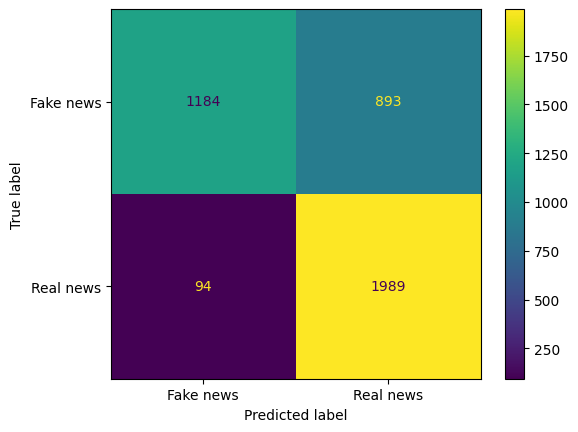

In [42]:
from sklearn.neighbors import KNeighborsClassifier

clf_bog_Kn = Pipeline([
    ('bag-of-words', CountVectorizer()),
    ('Kn',KNeighborsClassifier(n_neighbors=5))
])

clf_bog_Kn.fit(x_train, y_train)

y_pred = clf_bog_Kn.predict(x_test)

ConfusionMatrixDisplay.from_estimator(
                        clf_bog_Kn,
                        x_test,
                        y_test,
                        values_format='d',
                        display_labels=['Fake news','Real news'])
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))